In [1]:
%matplotlib inline

In [2]:
# Copyright (c) 2017,2018 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause

# Sigma to Pressure Interpolation

By using `metpy.calc.log_interp`, data with sigma as the vertical coordinate can be
interpolated to isobaric coordinates.

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date

from metpy.cbook import get_test_data
from metpy.interpolate import log_interpolate_1d
from metpy.plots import add_metpy_logo, add_timestamp
from metpy.units import units

**Data**

The data for this example comes from the outer domain of a WRF-ARW model forecast
initialized at 1200 UTC on 03 June 1980. Model data courtesy Matthew Wilson, Valparaiso
University Department of Geography and Meteorology.

In [4]:

data = Dataset(get_test_data('wrf_example.nc', False))
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
time = data.variables['time']
vtimes = num2date(time[:], time.units)
temperature = units.Quantity(data.variables['temperature'][:], 'degC')
pressure = units.Quantity(data.variables['pressure'][:], 'Pa')
hgt = units.Quantity(data.variables['height'][:], 'meter')

Array of desired pressure levels

In [5]:
plevs = [700.] * units.hPa

**Interpolate The Data**

Now that the data is ready, we can interpolate to the new isobaric levels. The data is
interpolated from the irregular pressure values for each sigma level to the new input
mandatory isobaric levels. `mpcalc.log_interp` will interpolate over a specified dimension
with the `axis` argument. In this case, `axis=1` will correspond to interpolation on the
vertical axis. The interpolated data is output in a list, so we will pull out each
variable for plotting.

In [6]:
height, temp = log_interpolate_1d(plevs, pressure, hgt, temperature, axis=1)

/var/folders/9w/czmy8vgn76376hx2704_y62w0000gp/T/ipykernel_38178/4286440434.py:1: UserWarning: Interpolation point out of data bounds encountered
  height, temp = log_interpolate_1d(plevs, pressure, hgt, temperature, axis=1)


**Plotting the Data for 700 hPa.**

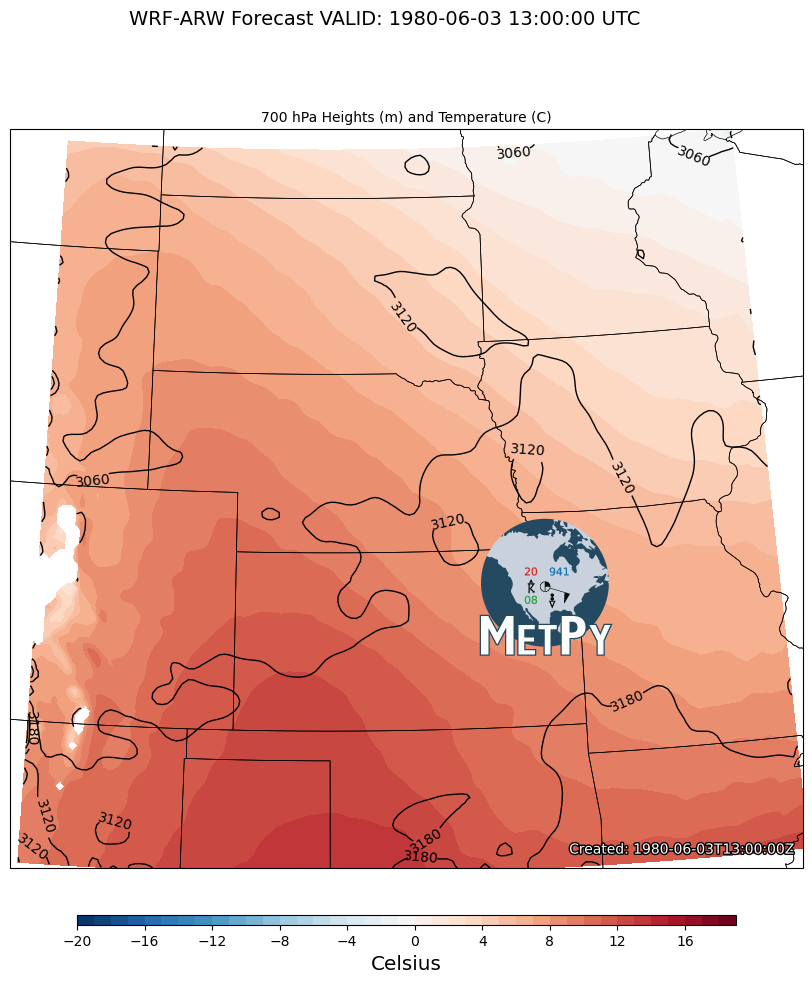

In [7]:
# Set up our projection
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Set the forecast hour
FH = 1

# Create the figure and grid for subplots
fig = plt.figure(figsize=(17, 12))
add_metpy_logo(fig, 470, 320, size='large')

# Plot 700 hPa
ax = plt.subplot(111, projection=crs)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.75)
ax.add_feature(cfeature.STATES, linewidth=0.5)

# Plot the heights
cs = ax.contour(lon, lat, height[FH, 0, :, :], transform=ccrs.PlateCarree(),
                colors='k', linewidths=1.0, linestyles='solid')
cs.clabel(fontsize=10, inline=1, inline_spacing=7, fmt='%i', rightside_up=True,
          use_clabeltext=True)

# Contour the temperature
cf = ax.contourf(lon, lat, temp[FH, 0, :, :], range(-20, 20, 1), cmap=plt.cm.RdBu_r,
                 transform=ccrs.PlateCarree())
cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.5, pad=0.05,
                  extendrect='True')
cb.set_label('Celsius', size='x-large')

ax.set_extent([-106.5, -90.4, 34.5, 46.75], crs=ccrs.PlateCarree())

# Make the axis title
ax.set_title(f'{plevs[0]:~.0f} Heights (m) and Temperature (C)', loc='center', fontsize=10)

# Set the figure title
fig.suptitle(f'WRF-ARW Forecast VALID: {vtimes[FH]} UTC', fontsize=14)
add_timestamp(ax, vtimes[FH], y=0.02, high_contrast=True)

plt.show()